In [91]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [92]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [93]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.037354,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.112885,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,277.688843,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,269.961212,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,264.444000,6048178


In [94]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178


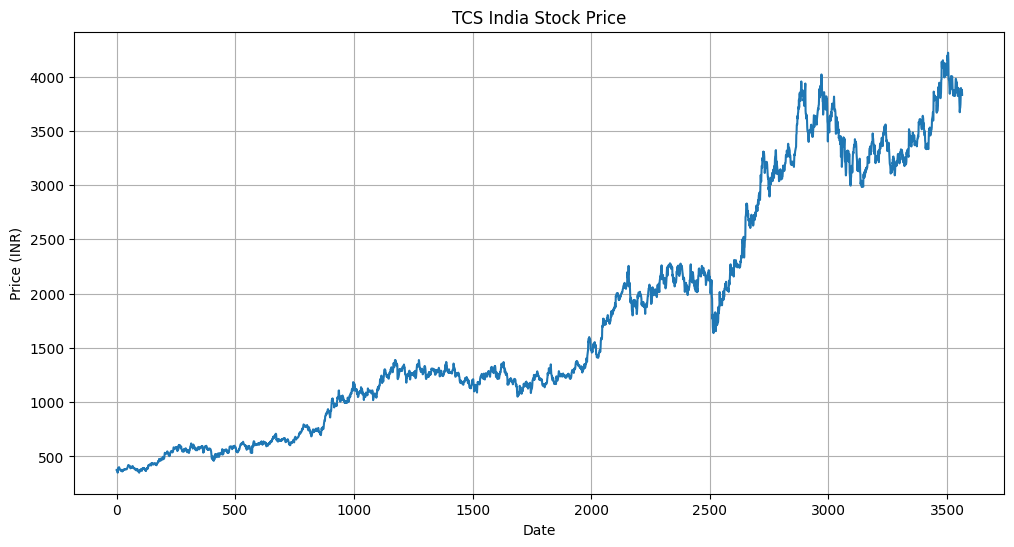

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [96]:
df

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178
...,...,...,...,...,...
3560,3895.000000,3905.899902,3841.899902,3858.699951,1734661
3561,3845.000000,3879.949951,3841.000000,3852.100098,1419898
3562,3874.399902,3893.500000,3827.449951,3831.649902,2177001
3563,3856.800049,3890.000000,3852.000000,3878.149902,1932323


In [97]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3560    3940.666008
3561    3942.056509
3562    3943.017507
3563    3942.971006
3564    3942.253506
Name: Close, Length: 3565, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

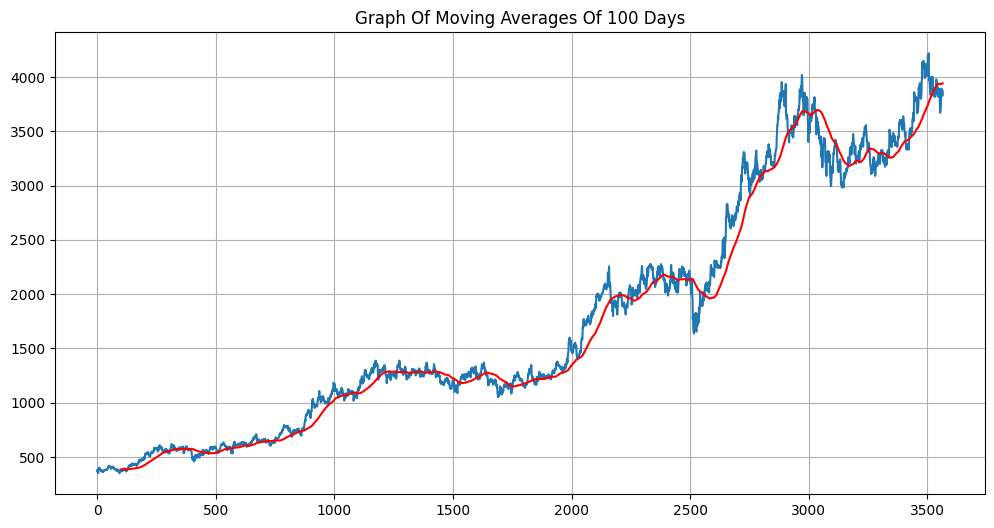

In [98]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [99]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3560    3737.486252
3561    3739.497502
3562    3741.363752
3563    3743.575752
3564    3745.900502
Name: Close, Length: 3565, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

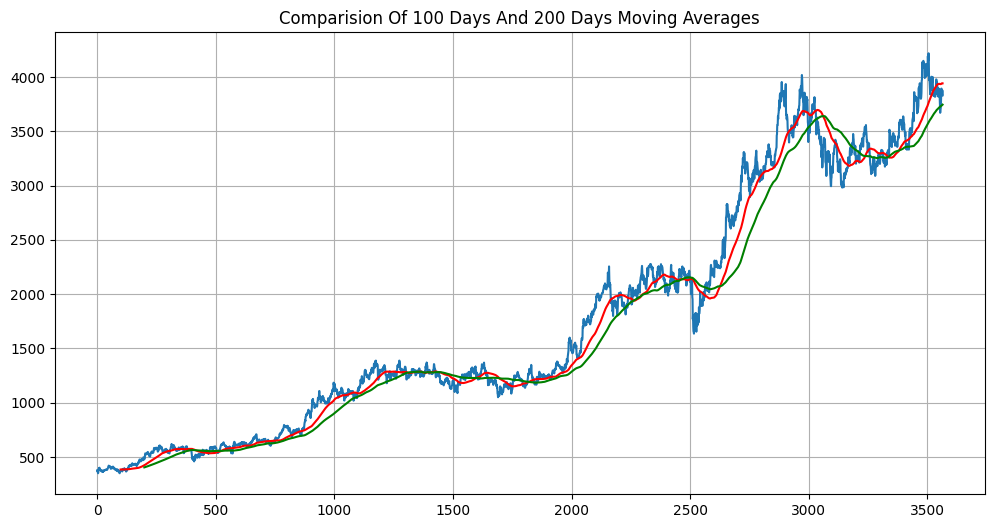

In [100]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [101]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2495, 7)
(1070, 7)


In [102]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.037354,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.112885,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,277.688843,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,269.961212,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,264.444000,6048178


In [103]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2495,2020-02-17,2196.949951,2217.000000,2190.199951,2203.250000,2022.118408,1774724
2496,2020-02-18,2199.949951,2221.000000,2186.050049,2215.750000,2033.590454,2486223
2497,2020-02-19,2215.750000,2230.000000,2190.500000,2196.350098,2015.786377,1760463
2498,2020-02-20,2204.500000,2214.399902,2151.250000,2156.800049,1979.487183,2317278
2499,2020-02-24,2156.000000,2178.949951,2106.699951,2115.350098,1941.444824,3092877


In [104]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [107]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [108]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01351019],
       [0.01356204],
       [0.00915373],
       ...,
       [0.94440341],
       [0.95539824],
       [0.95137889]])

In [109]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [110]:
x_train.shape

(2395, 100, 1)

In [111]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [112]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\Mrinal\OneDrive\Desktop\Stock-Price-Prediction-using-LSTM-FASTAPI-Streamlit\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - loss: 0.0963 - mean_absolute_error: 0.2217
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0094 - mean_absolute_error: 0.0704
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0073 - mean_absolute_error: 0.0585
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0067 - mean_absolute_error: 0.0561
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0056 - mean_absolute_error: 0.0519
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0053 - mean_absolute_error: 0.0497
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0058 - mean_absolute_error: 0.0512
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0052 - mean_absolute_error: 0.0502
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 0.0054 - mean_absolute_error: 0.0499
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.0052 - mean_absolute_error: 0.0485
Epoch 11/100
75/75

In [115]:
model.save('keras_model.h5')

In [116]:
test_close.shape

(1070, 1)

In [117]:
past_100_days = pd.DataFrame(train_close[-100:])

In [118]:
test_df = pd.DataFrame(test_close)

In [119]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [120]:
print(type(past_100_days))


<class 'pandas.core.frame.DataFrame'>


In [121]:
final_df.head()

,0
0,2015.800049
1,2044.699951
2,2088.449951
3,2087.600098
4,2056.149902


In [122]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.14690854],
       [0.15809748],
       [0.1750358 ],
       ...,
       [0.84993608],
       [0.8679391 ],
       [0.850091  ]])

In [123]:
input_data.shape

(1170, 1)

In [124]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [125]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1070, 100, 1)
(1070,)


In [126]:
y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


In [127]:
y_pred.shape

(1070, 1)

In [128]:
y_test

array([0.21948198, 0.22432151, 0.21681061, ..., 0.84993608, 0.8679391 ,
       0.850091  ])

In [129]:
y_pred

array([[0.24013452],
       [0.2428692 ],
       [0.2457924 ],
       ...,
       [0.8291893 ],
       [0.83811426],
       [0.8456912 ]], dtype=float32)

In [130]:
scaler.scale_

array([0.00038716])

In [131]:
scale_factor = 1/0.00080828
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

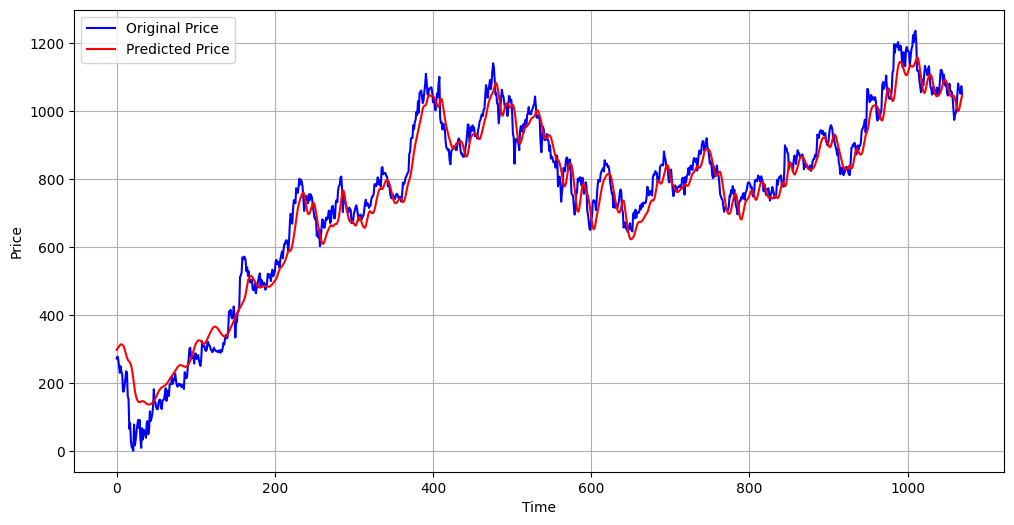

In [132]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.10%


In [135]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9666344433313596


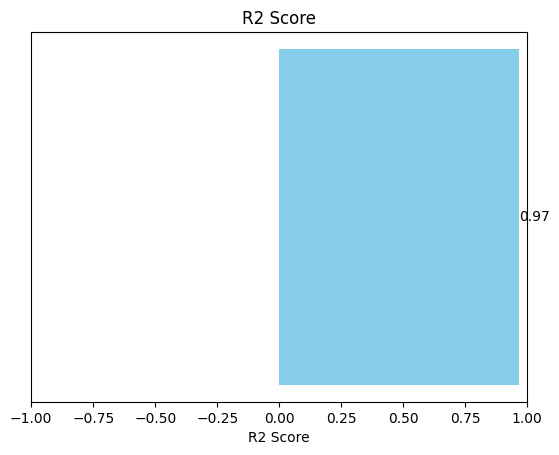

In [136]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

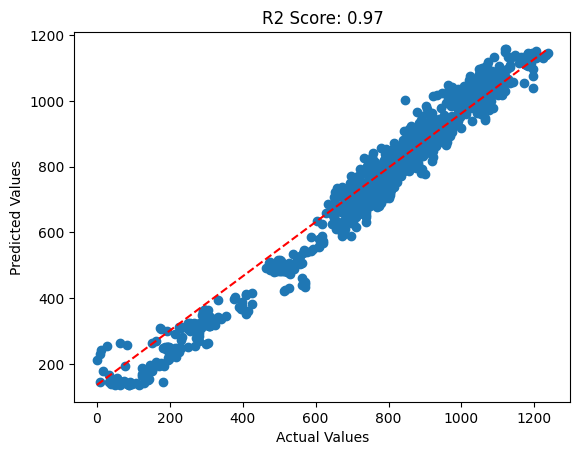

In [137]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()